In [1]:
import pandas as pd
%pylab inline
import numpy as np
import matplotlib
import music21 as mu
import pymongo
from pymongo import MongoClient
from bs4 import BeautifulSoup
import re
import pydash as py_

Populating the interactive namespace from numpy and matplotlib


In [101]:
xmlData = BeautifulSoup(open('FinalDataSet/XMLFiles/JazzSolos/KJAutumnLeaves1996_1371_192.xml'))

In [102]:
# notesDataFrame = pd.DataFrame
# notes = xmlData.find_all('note')
# print xmlData

In [103]:
allNotes = xmlData.findAll('note')

In [104]:
x = 0
listOfNoteEvents = []

for note in allNotes:
    
    #print note.pitch
    #print note.instrument.attrs.values()
    #print 'end'
    #print note.tie
    
    
    dictForNoteEvent = {}

    if note.parent.words:
        chord =  str(note.parent.words.text)
    else:
        chord = -1
        
        
        #dictForNoteEvent['chord'] = chord
       
    #else:
     #   dictForNoteEvent['chord'] = -1
    dictForNoteEvent['chordDisplayName'] = chord
    dictForNoteEvent['restFlag'] = note.rest
    dictForNoteEvent['noteName'] = note.step
    dictForNoteEvent['octave'] = note.octave
    dictForNoteEvent['duration'] = note.duration.text
    dictForNoteEvent['instrument'] = note.instrument.attrs.values()
    dictForNoteEvent['accidental'] = note.alter
    dictForNoteEvent['tieFlag'] = str(note.tie)
    
    listOfNoteEvents.append(dictForNoteEvent)
    



In [105]:
df = pd.DataFrame(listOfNoteEvents)

In [106]:
df.tail(100)

accidental chordDisplayName duration instrument        noteName  \
1371               None           D dom7     1024    [P2-I1]  <step>D</step>   
1372               None           G min7     1024    [P2-I1]  <step>G</step>   
1373               None           G dom7     1024    [P2-I1]  <step>G</step>   
1374               None           C min7     1024    [P2-I1]  <step>C</step>   
1375               None           F dom7     1024    [P2-I1]  <step>F</step>   
1376  <alter>-1</alter>          Bb maj7     1024    [P2-I1]  <step>B</step>   
1377  <alter>-1</alter>          Eb maj7     1024    [P2-I1]  <step>E</step>   
1378               None         A min7b5     1024    [P2-I1]  <step>A</step>   
1379               None           D dom7     1024    [P2-I1]  <step>D</step>   
1380               None           G min7     1024    [P2-I1]  <step>G</step>   
1381               None           G min7     1024    [P2-I1]  <step>G</step>   
1382               None         A min7b5     1024    [P2-I1]  <step>A</step>   
1383               None           D dom7     1024    [P2-I1]  <step>D</step>   
1384               None           G min7     1024    [P2-I1]  <step>G</step>   
1385               None           G dom7     1024    [P2-I1]  <step>G</step>   
1386               None           C min7     1024    [P2-I1]  <step>C</step>   
1387               None           F dom7     1024    [P2-I1]  <step>F</step>   
1388  <alter>-1</alter>          Bb maj7     1024    [P2-I1]  <step>B</step>   
1389  <alter>-1</alter>          Eb maj7     1024    [P2-I1]  <step>E</step>   
1390               None         A min7b5     1024    [P2-I1]  <step>A</step>   
1391               None           D dom7     1024    [P2-I1]  <step>D</step>   
1392               None           G min7      512    [P2-I1]  <step>G</step>   
1393   <alter>1</alter>           G min7      512    [P2-I1]  <step>F</step>   
1394               None           F dom7      512    [P2-I1]  <step>F</step>   
1395  <alter>-1</alter>           F dom7      512    [P2-I1]  <step>E</step>   
1396  <alter>-1</alter>          Eb maj7     1024    [P2-I1]  <step>E</step>   
1397               None           D dom7      512    [P2-I1]  <step>A</step>   
1398               None           D dom7      512    [P2-I1]  <step>D</step>   
1399               None           G min7     1024    [P2-I1]  <step>G</step>   
1400               None           G dom7     1024    [P2-I1]  <step>G</step>   
...                 ...              ...      ...        ...             ...   
1441               None           D dom7     1024    [P2-I1]  <step>D</step>   
1442               None           G min7     1024    [P2-I1]  <step>G</step>   
1443               None           G dom7     1024    [P2-I1]  <step>G</step>   
1444               None           C min7     1024    [P2-I1]  <step>C</step>   
1445               None           F dom7     1024    [P2-I1]  <step>F</step>   
1446  <alter>-1</alter>          Bb maj7     1024    [P2-I1]  <step>B</step>   
1447  <alter>-1</alter>          Eb maj7     1024    [P2-I1]  <step>E</step>   
1448               None         A min7b5     1024    [P2-I1]  <step>A</step>   
1449               None           D dom7     1024    [P2-I1]  <step>D</step>   
1450               None           G min7     1024    [P2-I1]  <step>G</step>   
1451               None           G min7     1024    [P2-I1]  <step>G</step>   
1452               None         A min7b5     1024    [P2-I1]  <step>A</step>   
1453               None           D dom7     1024    [P2-I1]  <step>D</step>   
1454               None           G min7     1024    [P2-I1]  <step>G</step>   
1455               None           G dom7     1024    [P2-I1]  <step>G</step>   
1456               None           C min7     1024    [P2-I1]  <step>C</step>   
1457               None           F dom7     1024    [P2-I1]  <step>F</step>   
1458  <alter>-1</alter>          Bb maj7     1024    [P2-I1]  <step>B</step>   
1459  <alter>

In [107]:
# first clean of data
def cleanAccidental(data_row):
    accidentalString = str(data_row['accidental'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test) 
    
df['accidental'] = df.apply(cleanAccidental, axis=1) 

def cleanNoteName(data_row):
    accidentalString = str(data_row['noteName'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test) 
    
df['noteName'] = df.apply(cleanNoteName, axis=1) 

def cleanOctave(data_row):
    accidentalString = str(data_row['octave'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test) 
    
df['octave'] = df.apply(cleanOctave, axis=1) 


        
def cleanRest(data_row):
    restVal = -1
    restAsString = str(data_row['restFlag'])
    if restAsString != 'None':
        restVal ='rest'
    else:
        restVal = 'note'

    return str(restVal)
    
df['restFlag'] = df.apply(cleanRest, axis=1)



In [108]:
df['restFlag'].value_counts()

note    1371
rest     100
dtype: int64

In [109]:
#second clean for parts and duration
def cleanPart(data_row):
    accidentalString = str(data_row['instrument'])
    test = accidentalString[3:5]
    return str(test) 

df['part'] = df.apply(cleanPart, axis=1)

def convertDurationAsPerQuarterNoteIsOneBeat(data_row):
    asFloat = float(data_row['duration'])
    return asFloat / 256

df['quarterNoteDuration'] = df.apply(convertDurationAsPerQuarterNoteIsOneBeat, axis=1)

In [110]:
df.head()

accidental chordDisplayName duration instrument noteName octave restFlag  \
0       None               -1      256    [P1-I1]     None   None     rest   
1       None               -1      128    [P1-I1]        G      4     note   
2       None               -1      128    [P1-I1]        A      4     note   
3         -1               -1      256    [P1-I1]        B      4     note   
4         -1               -1      128    [P1-I1]        E      4     note   

  tieFlag part  quarterNoteDuration  
0    None   P1                  1.0  
1    None   P1                  0.5  
2    None   P1                  0.5  
3    None   P1                  1.0  
4    None   P1                  0.5

In [111]:
# divide parts to ascertain location
partOne = df[df['part'] == 'P1']
partTwo = df[df['part'] == 'P2']

In [112]:
partOne['noteEventLocation'] = partOne['quarterNoteDuration'].cumsum()
partTwo['noteEventLocation'] = partTwo['quarterNoteDuration'].cumsum()

partOne['noteEventStartingLocation'] = partOne['noteEventLocation'].shift()
partTwo['noteEventStartingLocation'] = partTwo['noteEventLocation'].shift()


In [113]:
df = pd.concat([partOne, partTwo], axis=0)

In [114]:
df.head(3)

accidental chordDisplayName duration instrument noteName octave restFlag  \
0       None               -1      256    [P1-I1]     None   None     rest   
1       None               -1      128    [P1-I1]        G      4     note   
2       None               -1      128    [P1-I1]        A      4     note   

  tieFlag part  quarterNoteDuration  noteEventLocation  \
0    None   P1                  1.0                1.0   
1    None   P1                  0.5                1.5   
2    None   P1                  0.5                2.0   

   noteEventStartingLocation  
0                        NaN  
1                        1.0  
2                        1.5

In [115]:
#df = df.sort('noteEventLocation')
#df = df.reset_index()

In [116]:
df.head(10)

accidental chordDisplayName duration instrument noteName octave restFlag  \
0       None               -1      256    [P1-I1]     None   None     rest   
1       None               -1      128    [P1-I1]        G      4     note   
2       None               -1      128    [P1-I1]        A      4     note   
3         -1               -1      256    [P1-I1]        B      4     note   
4         -1               -1      128    [P1-I1]        E      4     note   
5       None               -1      128    [P1-I1]        F      4     note   
6       None               -1      256    [P1-I1]        G      4     note   
7       None               -1      128    [P1-I1]        A      4     note   
8         -1               -1      128    [P1-I1]        B      4     note   
9       None               -1      128    [P1-I1]        C      5     note   

  tieFlag part  quarterNoteDuration  noteEventLocation  \
0    None   P1                  1.0                1.0   
1    None   P1                  0.5                1.5   
2    None   P1                  0.5                2.0   
3    None   P1                  1.0                3.0   
4    None   P1                  0.5                3.5   
5    None   P1                  0.5                4.0   
6    None   P1                  1.0                5.0   
7    None   P1                  0.5                5.5   
8    None   P1                  0.5                6.0   
9    None   P1                  0.5                6.5   

   noteEventStartingLocation  
0                        NaN  
1                        1.0  
2                        1.5  
3                        2.0  
4                        3.0  
5                        3.5  
6                        4.0  
7                        5.0  
8                        5.5  
9                        6.0

In [117]:
#del df['index']
del df['duration']
del df['instrument']
del df['noteEventLocation']

In [118]:
df.head()

accidental chordDisplayName noteName octave restFlag tieFlag part  \
0       None               -1     None   None     rest    None   P1   
1       None               -1        G      4     note    None   P1   
2       None               -1        A      4     note    None   P1   
3         -1               -1        B      4     note    None   P1   
4         -1               -1        E      4     note    None   P1   

   quarterNoteDuration  noteEventStartingLocation  
0                  1.0                        NaN  
1                  0.5                        1.0  
2                  0.5                        1.5  
3                  1.0                        2.0  
4                  0.5                        3.0

In [119]:
#create midi frequency value
offsetForC = 0
offsetForD = 2
offsetForE = 4
offsetForF = 5
offsetForG = 7
offsetForA = 9
offsetForB = 11

def midiNumberAssign(data_row):
    
    def adjustForAccidental(accidentalVal):
        if accidentalVal == 'None':
            return 0
        else:
            return int(accidentalVal)

    if data_row['octave'] != "None":
        baseVal = int(data_row['octave']) * 12
        if data_row['noteName'] == 'C':
            return baseVal + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'D':
            return baseVal + offsetForD + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'E':
            return baseVal + offsetForE + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'F':
            return baseVal + offsetForF + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'G':
            return baseVal + offsetForG + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'A':
            return baseVal + offsetForA + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'B':
            return baseVal + offsetForB + adjustForAccidental(data_row['accidental'])
        



df['midiNumber'] = df.apply(midiNumberAssign, axis=1)

In [120]:
df.dtypes

accidental                    object
chordDisplayName              object
noteName                      object
octave                        object
restFlag                      object
tieFlag                       object
part                          object
quarterNoteDuration          float64
noteEventStartingLocation    float64
midiNumber                   float64
dtype: object

In [121]:
df[0:10]

accidental chordDisplayName noteName octave restFlag tieFlag part  \
0       None               -1     None   None     rest    None   P1   
1       None               -1        G      4     note    None   P1   
2       None               -1        A      4     note    None   P1   
3         -1               -1        B      4     note    None   P1   
4         -1               -1        E      4     note    None   P1   
5       None               -1        F      4     note    None   P1   
6       None               -1        G      4     note    None   P1   
7       None               -1        A      4     note    None   P1   
8         -1               -1        B      4     note    None   P1   
9       None               -1        C      5     note    None   P1   

   quarterNoteDuration  noteEventStartingLocation  midiNumber  
0                  1.0                        NaN         NaN  
1                  0.5                        1.0          55  
2                  0.5                        1.5          57  
3                  1.0                        2.0          58  
4                  0.5                        3.0          51  
5                  0.5                        3.5          53  
6                  1.0                        4.0          55  
7                  0.5                        5.0          57  
8                  0.5                        5.5          58  
9                  0.5                        6.0          60

In [122]:
def fixTiedNotes(data_row):
    tieFlagString = str(data_row['tieFlag'])
    durationToAdd = -1
    if tieFlagString == '<tie type="stop"></tie>':
        durationToAdd = data_row['quarterNoteDuration']
    else:
        durationToAdd = 0

    return durationToAdd
df['valueToAddToTiedNote'] = df.apply(fixTiedNotes, axis=1)

In [123]:
df.head(20)

accidental chordDisplayName noteName octave restFlag  \
0        None               -1     None   None     rest   
1        None               -1        G      4     note   
2        None               -1        A      4     note   
3          -1               -1        B      4     note   
4          -1               -1        E      4     note   
5        None               -1        F      4     note   
6        None               -1        G      4     note   
7        None               -1        A      4     note   
8          -1               -1        B      4     note   
9        None               -1        C      5     note   
10       None               -1        F      4     note   
11       None               -1        G      4     note   
12         -1               -1        A      4     note   
13         -1               -1        A      4     note   
14       None               -1        F      4     note   
15         -1               -1        A      4     note   
16       None               -1        G      4     note   
17         -1               -1        A      4     note   
18       None               -1        C      5     note   
19         -1               -1        E      5     note   

                     tieFlag part  quarterNoteDuration  \
0                       None   P1                  1.0   
1                       None   P1                  0.5   
2                       None   P1                  0.5   
3                       None   P1                  1.0   
4                       None   P1                  0.5   
5                       None   P1                  0.5   
6                       None   P1                  1.0   
7                       None   P1                  0.5   
8                       None   P1                  0.5   
9                       None   P1                  0.5   
10                      None   P1                  0.5   
11                      None   P1                  0.5   
12  <tie type="start"></tie>   P1                  0.5   
13   <tie type="stop"></tie>   P1                  1.0   
14                      None   P1                  0.5   
15                      None   P1                  0.5   
16                      None   P1                  0.5   
17                      None   P1                  0.5   
18                      None   P1                  0.5   
19                      None   P1                  0.5   

    noteEventStartingLocation  midiNumber  valueToAddToTiedNote  
0                         NaN         NaN                     0  
1                         1.0          55                     0  
2                         1.5          57                     0  
3                         2.0          58                     0  
4                         3.0          51                     0  
5                         3.5          53                     0  
6                         4.0          55                     0  
7                         5.0          57                     0  
8                         5.5          58                     0  
9                         6.0          60                     0  
10                        6.5          53                     0  
11                        7.0          55                     0  
12                        7.5          56                     0  
13                        8.0          56                     1  
14                        9.0          53                     0  
15                        9.5          56                     0  
16                       10.0          55                     0  
17                       10.5          56                     0  
18                       11.0          60                     0  
19                       11.5          63                     0

In [124]:
df['moveTieForFix'] = df['valueToAddToTiedNote'].shift(-1)

In [125]:
df = df[df.tieFlag != '<tie type="stop"></tie>']

In [126]:
df.head()

accidental chordDisplayName noteName octave restFlag tieFlag part  \
0       None               -1     None   None     rest    None   P1   
1       None               -1        G      4     note    None   P1   
2       None               -1        A      4     note    None   P1   
3         -1               -1        B      4     note    None   P1   
4         -1               -1        E      4     note    None   P1   

   quarterNoteDuration  noteEventStartingLocation  midiNumber  \
0                  1.0                        NaN         NaN   
1                  0.5                        1.0          55   
2                  0.5                        1.5          57   
3                  1.0                        2.0          58   
4                  0.5                        3.0          51   

   valueToAddToTiedNote  moveTieForFix  
0                     0              0  
1                     0              0  
2                     0              0  
3                     0              0  
4                     0              0

In [127]:
df['updatedQuarterNoteDuration'] = df['quarterNoteDuration'] + df['moveTieForFix']

In [128]:
df.head()

accidental chordDisplayName noteName octave restFlag tieFlag part  \
0       None               -1     None   None     rest    None   P1   
1       None               -1        G      4     note    None   P1   
2       None               -1        A      4     note    None   P1   
3         -1               -1        B      4     note    None   P1   
4         -1               -1        E      4     note    None   P1   

   quarterNoteDuration  noteEventStartingLocation  midiNumber  \
0                  1.0                        NaN         NaN   
1                  0.5                        1.0          55   
2                  0.5                        1.5          57   
3                  1.0                        2.0          58   
4                  0.5                        3.0          51   

   valueToAddToTiedNote  moveTieForFix  updatedQuarterNoteDuration  
0                     0              0                         1.0  
1                     0              0                         0.5  
2                     0              0                         0.5  
3                     0              0                         1.0  
4                     0              0                         0.5

In [129]:
df.head()

accidental chordDisplayName noteName octave restFlag tieFlag part  \
0       None               -1     None   None     rest    None   P1   
1       None               -1        G      4     note    None   P1   
2       None               -1        A      4     note    None   P1   
3         -1               -1        B      4     note    None   P1   
4         -1               -1        E      4     note    None   P1   

   quarterNoteDuration  noteEventStartingLocation  midiNumber  \
0                  1.0                        NaN         NaN   
1                  0.5                        1.0          55   
2                  0.5                        1.5          57   
3                  1.0                        2.0          58   
4                  0.5                        3.0          51   

   valueToAddToTiedNote  moveTieForFix  updatedQuarterNoteDuration  
0                     0              0                         1.0  
1                     0              0                         0.5  
2                     0              0                         0.5  
3                     0              0                         1.0  
4                     0              0                         0.5

In [130]:
df['part'].value_counts()

P1    1251
P2     210
dtype: int64

In [131]:
#get rid of unused columns
del df['tieFlag']
del df['valueToAddToTiedNote']
del df['moveTieForFix']
del df['accidental']
del df['noteName']
del df['octave']
del df['quarterNoteDuration']

In [132]:
df['noteEventStartingLocation'].fillna(0.0, inplace=True)

In [133]:
#df['midiNumber'].fillna(-1, inplace=True)

In [134]:
df.head(20)

chordDisplayName restFlag part  noteEventStartingLocation  midiNumber  \
0                -1     rest   P1                        0.0         NaN   
1                -1     note   P1                        1.0          55   
2                -1     note   P1                        1.5          57   
3                -1     note   P1                        2.0          58   
4                -1     note   P1                        3.0          51   
5                -1     note   P1                        3.5          53   
6                -1     note   P1                        4.0          55   
7                -1     note   P1                        5.0          57   
8                -1     note   P1                        5.5          58   
9                -1     note   P1                        6.0          60   
10               -1     note   P1                        6.5          53   
11               -1     note   P1                        7.0          55   
12               -1     note   P1                        7.5          56   
14               -1     note   P1                        9.0          53   
15               -1     note   P1                        9.5          56   
16               -1     note   P1                       10.0          55   
17               -1     note   P1                       10.5          56   
18               -1     note   P1                       11.0          60   
19               -1     note   P1                       11.5          63   
20               -1     note   P1                       12.0          62   

    updatedQuarterNoteDuration  
0                          1.0  
1                          0.5  
2                          0.5  
3                          1.0  
4                          0.5  
5                          0.5  
6                          1.0  
7                          0.5  
8                          0.5  
9                          0.5  
10                         0.5  
11                         0.5  
12                         1.5  
14                         0.5  
15                         0.5  
16                         0.5  
17                         0.5  
18                         0.5  
19                         0.5  
20                         0.5

In [135]:
df['quarterNoteDuration'] = df['updatedQuarterNoteDuration']
del df['updatedQuarterNoteDuration']

In [136]:
df.head()

chordDisplayName restFlag part  noteEventStartingLocation  midiNumber  \
0               -1     rest   P1                        0.0         NaN   
1               -1     note   P1                        1.0          55   
2               -1     note   P1                        1.5          57   
3               -1     note   P1                        2.0          58   
4               -1     note   P1                        3.0          51   

   quarterNoteDuration  
0                  1.0  
1                  0.5  
2                  0.5  
3                  1.0  
4                  0.5

In [137]:
df['nextNoteFreqDistance'] = df['midiNumber'].shift(-1)
df['nextNoteFreqDistance'] = df['nextNoteFreqDistance'] - df['midiNumber']

In [138]:
df[df['part'] == 'P2'][0:5]

chordDisplayName restFlag part  noteEventStartingLocation  midiNumber  \
1261           C min7     note   P2                          0          48   
1262           F dom7     note   P2                          4          41   
1263          Bb maj7     note   P2                          8          46   
1264          Eb maj7     note   P2                         12          51   
1265         A min7b5     note   P2                         16          45   

      quarterNoteDuration  nextNoteFreqDistance  
1261                    4                    -7  
1262                    4                     5  
1263                    4                     5  
1264                    4                    -6  
1265                    4                     5

<div>Chord Clean up</div>

In [139]:
def getChordRootAsInt(data_row):
    x = data_row['chordDisplayName']
    if x != -1:    
        chordLetterVal = data_row['chordDisplayName'][0:2]
        #print chordLetterVal
        if chordLetterVal.strip() == 'C':
            return 0
        elif chordLetterVal.strip() =='C#':
            return 1
        elif chordLetterVal.strip() == 'Db':
            return 1
        elif chordLetterVal.strip() == 'D':
            return 2
        elif chordLetterVal.strip() == 'D#':
            return 3
        elif chordLetterVal.strip() == 'Eb':
            return 3
        elif chordLetterVal.strip() == 'E':
            return 4
        elif chordLetterVal.strip() == 'F':
            return 5
        elif chordLetterVal.strip() == 'F#':
            return 6
        elif chordLetterVal.strip() == 'Gb':
            return 6
        elif chordLetterVal.strip() == 'G':
            return 7
        elif chordLetterVal.strip() == 'G#':
            return 8
        elif chordLetterVal.strip() == 'Ab':
            return 8
        elif chordLetterVal.strip() == 'A':
            return 9
        elif chordLetterVal.strip() == 'A#':
            return 10
        elif chordLetterVal.strip() == 'Bb':
            return 10
        elif chordLetterVal.strip() == 'B':
            return 11
        else:
            return -1
        
    

df['chordRootAsInt'] = df.apply(getChordRootAsInt, axis=1)

In [140]:
def getChordTypeAsInt(data_row):
    x = data_row['chordDisplayName']
    if x != -1:
        #print x
        chordType = re.findall('\s(.*)', x)
        chordType = str(chordType[0])
        if chordType == 'maj7':
            return 0
        elif chordType == 'min7':
            return 1
        elif chordType == 'dom7':
            return 2
        elif chordType == 'dim7':
            return 3
        elif chordType == 'maj7b5':
            return 4
        elif chordType == 'maj7#5':
            return 5
        elif chordType == 'maj7sus4':
            return 6
        elif chordType == 'min7b5':
            return 7
        elif chordType == 'dom7b5':
            return 8
        elif chordType == 'dom7#5':
            return 9
        elif chordType == 'dom7sus4':
            return 10
        
        
        
        
        return chordType

df['chordTypeAsInt'] = df.apply(getChordTypeAsInt, axis=1)

In [141]:
def chordBassAsInt(data_row):
    x = data_row['chordDisplayName']
    if x != -1:
        x = str(x)
        indexOfBackslash = x.find('/')
        if indexOfBackslash == -1:
            return -1
        else:
            #function to deal with bass note
            return 'placeholder'
    
df['chordBassAsInt'] = df.apply(chordBassAsInt, axis=1)

In [142]:
df[df['part'] == 'P2'][0:10]

chordDisplayName restFlag part  noteEventStartingLocation  midiNumber  \
1261           C min7     note   P2                          0          48   
1262           F dom7     note   P2                          4          41   
1263          Bb maj7     note   P2                          8          46   
1264          Eb maj7     note   P2                         12          51   
1265         A min7b5     note   P2                         16          45   
1266           D dom7     note   P2                         20          50   
1267           G min7     note   P2                         24          43   
1268           G dom7     note   P2                         28          43   
1269           C min7     note   P2                         32          48   
1270           F dom7     note   P2                         36          41   

      quarterNoteDuration  nextNoteFreqDistance  chordRootAsInt  \
1261                    4                    -7               0   
1262                    4                     5               5   
1263                    4                     5              10   
1264                    4                    -6               3   
1265                    4                     5               9   
1266                    4                    -7               2   
1267                    4                     0               7   
1268                    4                     5               7   
1269                    4                    -7               0   
1270                    4                     5               5   

      chordTypeAsInt  chordBassAsInt  
1261               1              -1  
1262               2              -1  
1263               0              -1  
1264               0              -1  
1265               7              -1  
1266               2              -1  
1267               1              -1  
1268               2              -1  
1269               1              -1  
1270               2              -1

In [143]:
df.head()

chordDisplayName restFlag part  noteEventStartingLocation  midiNumber  \
0               -1     rest   P1                        0.0         NaN   
1               -1     note   P1                        1.0          55   
2               -1     note   P1                        1.5          57   
3               -1     note   P1                        2.0          58   
4               -1     note   P1                        3.0          51   

   quarterNoteDuration  nextNoteFreqDistance  chordRootAsInt  chordTypeAsInt  \
0                  1.0                   NaN             NaN             NaN   
1                  0.5                     2             NaN             NaN   
2                  0.5                     1             NaN             NaN   
3                  1.0                    -7             NaN             NaN   
4                  0.5                     2             NaN             NaN   

   chordBassAsInt  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

<h2>Data Analysis</h2>
<div>Questions to ask:</div>
<div>Chapter 4: Rhythm</div>
<div>Typical rhythmic patterns</div>
<div>Is tempo a determiner</div>
<div>Is time signature a determiner</div>
<div>Chapter 5: Melody</div>
<div>Melodic pattersn (without rhythm)</div>
<div>Melodic patterns with rhythm</div>
<div>How long are the most used micro-phrases</div>
<div>How determinant is key</div>
<div>How important is the melody of the song as a determiner</div>
<div>Chapter 6: Harmony</div>
<div>Chord progressions as most used</div>
<div>Chord progressions in certain keys</div>
<div>Density of chord progressions</div>

<div>Decision logging and generative decision making</div>
<div>influence of Polyphony</div>

<div>The first investigation will be to look at rhythm. Patterns accross the 10 solos are </div>

In [144]:
rowIt = df.iterrows()

In [145]:
theList = []

for index, row in rowIt:
    if str(row['restFlag']) == 'rest':
        theList.append(-1)
    else:
        theList.append(row['quarterNoteDuration'])
        

        

In [146]:
chunkedDurationArray = []

for durations in theList:
    newList =[]
    if durations == -1:
        chunkedDurationArray.append(newList)
        newList = []
    else:
        newList.append(durations)

In [148]:
chunkedDurationArray = []
tempArray = []

for x in theList:
    if x != -1:
        tempArray.append(x)
    if x == -1:
        chunkedDurationArray.append(tempArray)
        tempArray = []
        

In [150]:
chunkedDurationArray

[[],
 [0.5,
  0.5,
  1.0,
  0.5,
  0.5,
  1.0,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  1.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  1.0,
  1.5,
  0.5,
  0.5,
  1.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  1.0,
  1.0,
  2.0],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 2.0],
 [],
 [0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.6640625,
  0.66796875],
 [0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  1.0,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5],
 [0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  1.0,
  0.5,
  0.5,
  1.0,
  1.0],
 [],
 [0.5, 0.5, 0.5, 0.5, 0.5, 1.0

In [149]:
for stuff in chunkedDurationArray:
    print len(stuff)

0
60
12
0
14
31
20
0
8
2
28
0
0
25
46
26
4
14
0
37
41
0
21
4
54
22
14
36
0
0
12
74
6
5
44
27
7
0
19
12
11
12
0
0
15
0
7
34
3
38
0
8
0
7
0
14
0
16
0
5
15
4
38
2
0
1
0
0
51
0
25
20
21
4
21
3
6
0
0
45
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


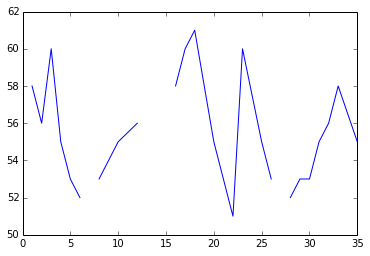

In [90]:
df[df['part'] == 'P1']['midiNumber'][0:30].plot()

In [107]:
#find sequences and ngrams

In [161]:
test = df['nextNoteFreqDistance'].as_matrix()

In [165]:
B = np.array_split(test,4)

In [166]:
B

[array([ nan,  -2.,   4.,  -5.,  -2.,  -1.,  nan,  nan,   2.,   1.,  nan,
         nan,  nan,   2.,   1.,  -6.,  -2.,  -2.,   9.,  -5.,  -2.,  nan,
         nan,   1.,   0.,   2.,   1.,   2.,  -3.,  -2.,  -1.,   1.,   2.,
         nan,  nan,  nan,  nan,  -2.,   2.,   1.,  -2.,   2.,   2.,   1.,
          2.,  -3.,  -2.,   3.,   4.,   3.,   4.,  -2.,  -3.,  -4.,  -2.,
         -1.,  nan,  nan,  nan,   1.,   2.,   2.,   1.,  -1.,  -2.,  -1.,
          3.,  -3.,  -4.,  -1.,   1.,  -1.,  nan,  nan,  nan,  nan,  nan,
         -2.,   2.,   1.,   0.,  -1.,   1.,   2.,   2.,  -4.,  -3.,  nan,
         nan,  nan,  -3.,  -4.,  nan,  nan,  nan,  -3.,   1.,   2.,   2.,
         nan,  nan,  nan,   1.,   2.,   2.,   2.,   1.,   2.,   2.,  -4.,
          2.,  -2.,  -1.,   3.,  -3.,  -2.,  -2.,   4.,  -4.,  -2.,  -1.,
          3.,   1.,  -4.,  -4.,   4.,  -3.,   5.,  -6.,  -1.,  nan,  nan,
          3.,  -3.,   1.,  -2.,  nan,  nan,  -1.,   1.,  nan,  nan,  nan,
         nan,  -1.,   1.,  nan,  nan, 

In [95]:
#py_.chunk(df['nextNoteFreqDistance'].values(), 3)

In [96]:
partOneAsMatrix = df[df['part'] == 'P1']
matrix = partOneAsMatrix[['part','quarterNoteDuration','noteEventStartingLocation', 'midiNumber']].as_matrix()

In [104]:
matrix[0:20]

array([['P1', 1.0, 0.0, nan],
       ['P1', 1.0, 1.0, 49.0],
       ['P1', 2.0, 2.0, 49.0],
       ['P1', 1.5, 4.0, 60.0],
       ['P1', 0.5, 5.5, 57.0],
       ['P1', 1.0, 6.0, 53.0],
       ['P1', 1.0, 7.0, 52.0],
       ['P1', 0.5, 8.0, nan],
       ['P1', 1.0, 8.5, 53.0],
       ['P1', 1.0, 9.5, 57.0],
       ['P1', 1.5, 10.5, 49.0],
       ['P1', 1.0, 12.0, nan],
       ['P1', 0.5, 13.0, nan],
       ['P1', 0.5, 13.5, 49.0],
       ['P1', 1.0, 14.0, 60.0],
       ['P1', 2.0, 15.0, 61.0],
       ['P1', 1.0, 17.0, 57.0],
       ['P1', 1.0, 18.0, 53.0],
       ['P1', 0.5, 19.0, 51.0],
       ['P1', 2.0, 19.5, 60.0]], dtype=object)

In [98]:
#create 
threeNoteSequences = []
phraseLength = 3


for x in range(len(matrix)):
    noteTuple= []
    currentNote = matrix[x][3]
    #print matrix[x]
    noteTuple.append(str(currentNote))
    #secondNote = None
    #thirdNote = None
    
    try:
        secondNote = matrix[x+1][3]
        noteTuple.append(str(secondNote))
        
    except: 
        pass
    
    try:
        thirdNote = matrix[x+2][3]
        noteTuple.append(str(thirdNote))
    except: 
        pass
    
    threeNoteSequences.append(noteTuple)
    
    


#print threeNoteSequences

In [99]:
df2 = pd.DataFrame(threeNoteSequences, columns=['one', 'two', 'three'])

In [100]:
df2['next'] = (df2['one'] +  df2['two'] +  df2['three'])

In [101]:
df2

one   two three          next
0      nan  49.0  49.0   nan49.049.0
1     49.0  49.0  60.0  49.049.060.0
2     49.0  60.0  57.0  49.060.057.0
3     60.0  57.0  53.0  60.057.053.0
4     57.0  53.0  52.0  57.053.052.0
5     53.0  52.0   nan   53.052.0nan
6     52.0   nan  53.0   52.0nan53.0
7      nan  53.0  57.0   nan53.057.0
8     53.0  57.0  49.0  53.057.049.0
9     57.0  49.0   nan   57.049.0nan
10    49.0   nan   nan    49.0nannan
11     nan   nan  49.0    nannan49.0
12     nan  49.0  60.0   nan49.060.0
13    49.0  60.0  61.0  49.060.061.0
14    60.0  61.0  57.0  60.061.057.0
15    61.0  57.0  53.0  61.057.053.0
16    57.0  53.0  51.0  57.053.051.0
17    53.0  51.0  60.0  53.051.060.0
18    51.0  60.0  57.0  51.060.057.0
19    60.0  57.0  53.0  60.057.053.0
20    57.0  53.0   nan   57.053.0nan
21    53.0   nan  52.0   53.0nan52.0
22     nan  52.0  53.0   nan52.053.0
23    52.0  53.0  53.0  52.053.053.0
24    53.0  53.0  57.0  53.053.057.0
25    53.0  57.0  49.0  53.057.049.0
26    57.0  49.0  49.0  57.049.049.0
27    49.0  49.0  57.0  49.049.057.0
28    49.0  57.0  53.0  49.057.053.0
29    57.0  53.0  52.0  57.053.052.0
...    ...   ...   ...           ...
2000   nan   nan   nan     nannannan
2001   nan   nan   nan     nannannan
2002   nan   nan   nan     nannannan
2003   nan   nan   nan     nannannan
2004   nan   nan   nan     nannannan
2005   nan   nan   nan     nannannan
2006   nan   nan   nan     nannannan
2007   nan   nan   nan     nannannan
2008   nan   nan   nan     nannannan
2009   nan   nan   nan     nannannan
2010   nan   nan   nan     nannannan
2011   nan   nan   nan     nannannan
2012   nan   nan   nan     nannannan
2013   nan   nan   nan     nannannan
2014   nan   nan   nan     nannannan
2015   nan   nan   nan     nannannan
2016   nan   nan   nan     nannannan
2017   nan   nan   nan     nannannan
2018   nan   nan   nan     nannannan
2019   nan   nan   nan     nannannan
2020   nan   nan   nan     nannannan
2021   nan   nan   nan     nannannan
2022   nan   nan   nan     nannannan
2023   nan   nan   nan     nannannan
2024   nan   nan   nan     nannannan
2025   nan   nan   nan     nannannan
2026   nan   nan   nan     nannannan
2027   nan   nan   nan     nannannan
2028   nan   nan  None           NaN
2029   nan  None  None           NaN

[2030 rows x 4 columns]

In [102]:
df2['next'].value_counts()

nannannan       51
57.049.049.0    30
49.057.049.0    28
49.049.057.0    18
nan57.049.0     12
49.049.050.0    11
49.053.049.0    10
49.0nannan      10
50.054.050.0    10
nannan49.0      10
53.057.049.0     9
49.048.051.0     9
49.050.049.0     9
50.049.049.0     8
nannan57.0       8
50.0nannan       8
60.049.057.0     8
50.049.050.0     8
50.050.057.0     8
49.057.053.0     8
54.057.050.0     7
49.049.0nan      7
48.051.049.0     7
60.050.050.0     7
62.063.060.0     6
48.049.051.0     6
57.049.060.0     6
50.052.054.0     6
52.0nannan       6
53.049.060.0     6
                ..
50.053.064.0     1
68.050.060.0     1
53.051.038.0     1
50.057.053.0     1
38.037.0nan      1
61.049.061.0     1
nan49.063.0      1
53.057.0nan      1
nan52.054.0      1
58.038.052.0     1
65.066.062.0     1
52.054.0nan      1
63.062.057.0     1
49.063.050.0     1
61.0nan57.0      1
37.0nan57.0      1
57.050.049.0     1
63.050.054.0     1
70.064.065.0     1
54.052.0nan      1
65.062.049.0     1
62.050.064.0

In [103]:
#df2['merged'] = str(df2[1]) + ',' + str(df2[2])

In [ ]:
#df2['merged'].value_counts()